In [28]:
#Dependencies

import requests
import json
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [29]:
# The path to our CSV file
#(name the file we are going to read as "file_gdp")
file_gdp = "suicides_vs_gdp_o.csv"

# Read Suicide Data our Kickstarter data into pandas 
#rename it as a dataframe(df) for ease of readibiity
su_vs_gdp_o_df = pd.read_csv(file_gdp)

# Display all columns 
su_vs_gdp_o_df.columns



Index(['index', 'country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'year_gdp', 'gdp_per_capita ($)',
       'generation'],
      dtype='object')

In [30]:
# Display information of the df
su_vs_gdp_o_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
index                 27820 non-null int64
country               27820 non-null object
year                  27820 non-null int64
sex                   27820 non-null object
age                   27820 non-null object
suicides_no           27820 non-null int64
population            27820 non-null int64
suicides/100k pop     27820 non-null float64
country-year          27820 non-null object
year_gdp              27820 non-null int64
gdp_per_capita ($)    27820 non-null object
generation            27820 non-null object
dtypes: float64(1), int64(5), object(6)
memory usage: 2.5+ MB


In [31]:
# Group using 'country-year' column and using the aggregate command to define/combine data to respective column.
# for ease of readibility(also we are ommitting columns we do not need)
su_vs_gdp_df = su_vs_gdp_o_df.groupby('country-year').agg({'country':'first', 'year':'first', 
                                                           'suicides_no':'sum','population':'sum', 
                                                           'suicides/100k pop':'sum',
                                                           'year_gdp':'first',
                                                           'gdp_per_capita ($)':'first'}).reset_index()


##  Create PIE CHART  for "TOP GDP"

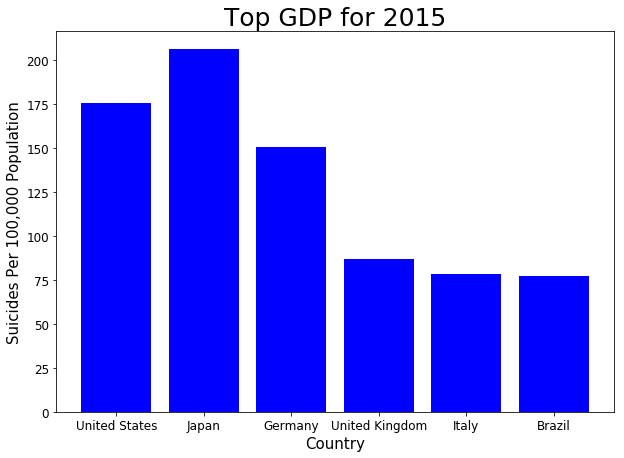

In [32]:
# It is possible to sort based upon multiple columns
# here we are sorting by highest gdp
sort_gdp_df = su_vs_gdp_df.sort_values(["year_gdp"], ascending=False)

# Filter the data so that only those in 2015 are in a DataFrame and save as new dataframe(df)
gdp_2015_df = sort_gdp_df.query("year == '2015'")
gdp_2015_df.head(6)

#Create new dataframe(df) to hold top x countries with highest year_gdp
gdp_2015_df_top_6 = gdp_2015_df.head(6)
gdp_2015_df_top_6


# Create an array that contains the number of users each language has
country1= gdp_2015_df_top_6['country']
suicides1=gdp_2015_df_top_6['suicides/100k pop']

# Tell matplotlib where we would like to place each of our x axis headers
plt.figure(figsize=(10,7))
plt.bar(country1, suicides1, color="blue", align="center")

# # Give the chart a title, x label, and y label
plt.title("Top GDP for 2015",fontsize=25)
plt.xlabel("Country",fontsize=15)
plt.ylabel("Suicides Per 100,000 Population",fontsize=15)
plt.rcParams['font.size'] = 12.0

plt.savefig('top_gdp.png')



## Create PIE CHART  for "TOP SUICIDE"

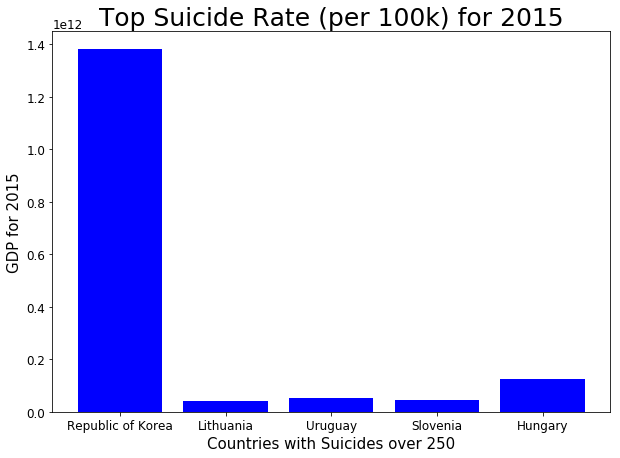

In [33]:
# It is possible to sort based upon multiple columns
# here we are sorting by highest suicide rate
sort_suicide_df = su_vs_gdp_df.sort_values(
    ["suicides/100k pop"], ascending=False)
sort_suicide_df.head()

# Filter so that only those in 2015 are in a DataFrame and save as new dataframe(df)
suicide_2015_df = sort_suicide_df.query("year == '2015'")
suicide_2015_df.head()

# Create an array that contains the number of users each language has
country2 = suicide_2015_df.head()['country']
gdp2 = suicide_2015_df.head()['year_gdp']

# Tell matplotlib we want to establish a bar graph and indicate its size
plt.figure(figsize=(10,7))
plt.bar(country2, gdp2, color="blue", align="center")

# # Give the chart a title, x label, and y label
plt.title("Top Suicide Rate (per 100k) for 2015", fontsize=25)
plt.xlabel("Countries with Suicides over 250", fontsize=15)
plt.ylabel("GDP for 2015", fontsize=15)

# Save image
plt.savefig('top_suicide.png')
